In [90]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

# For performing statistical operations
import scipy.stats as stats

# For check for multi col-linearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For standardizing features
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

# For checking accuracy score of the models
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report,accuracy_score,auc

#For outlier treatment
from scipy.stats.mstats import winsorize

# For tuning model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

In [91]:
data = pd.ExcelFile('DataAnalyticsProblem.xlsx')
data.sheet_names


['INFO', 'Existing employees', 'Employees who have left', 'Presentation']

In [92]:
exist = pd.read_excel('DataAnalyticsProblem.xlsx', sheet_name="Existing employees",)
print(exist.shape)
exist.head(5)

(11428, 10)


Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2001                0.58             0.74               4   
1    2002                0.82             0.67               2   
2    2003                0.45             0.69               5   
3    2004                0.78             0.82               5   
4    2005                0.49             0.60               3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   215                   3              0   
1                   202                   3              0   
2                   193                   3              0   
3                   247                   3              0   
4                   214                   2              0   

   promotion_last_5years   dept salary  
0                      0  sales    low  
1                      0  sales    low  
2                      0  sales    low  
3                      0  sales    low  
4                      0  sales    low

In [93]:
left1 = pd.read_excel('DataAnalyticsProblem.xlsx', sheet_name="Employees who have left",)
print(left1.shape)
left1.head(5)

(3571, 10)


Emp ID  satisfaction_level  last_evaluation  number_project  \
0       1                0.38             0.53               2   
1       2                0.80             0.86               5   
2       3                0.11             0.88               7   
3       4                0.72             0.87               5   
4       5                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years   dept  salary  
0                      0  sales     low  
1                      0  sales  medium  
2                      0  sales  medium  
3                      0  sales     low  
4                      0  sales     low

In [94]:
exist["status"]="exist"
left1["status"]="left"

In [95]:
list1 = [exist, left1]

df = pd.concat(list1)

In [96]:
df.head(5)

Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2001                0.58             0.74               4   
1    2002                0.82             0.67               2   
2    2003                0.45             0.69               5   
3    2004                0.78             0.82               5   
4    2005                0.49             0.60               3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   215                   3              0   
1                   202                   3              0   
2                   193                   3              0   
3                   247                   3              0   
4                   214                   2              0   

   promotion_last_5years   dept salary status  
0                      0  sales    low  exist  
1                      0  sales    low  exist  
2                      0  sales    low  exist  
3                      0  sales    low  exist  
4                      0  sales    low  exist

### Data Types and Missing Values
The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "?" rather than as np.nan (not a number). This means that the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [97]:
# See the column data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.4+ MB


## Missing Values

In [98]:
# Replace all occurrences of ? with numpy not a number
df.replace('?',np.nan,inplace=True)

We can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.     
     
Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. As with many tasks in data science, we did not write this function ourselves, but rather found it online in a Stack Overflow forum!     

In [99]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [100]:
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

### **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.


In [101]:
from pandas_profiling import ProfileReport

In [102]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [103]:
profile

### Detailed Description from Pandas Profiling:

Using Pandas Profiling ,we get the output of univariate Analysis of every column whether it is categorical or Numerical.



##### Status:
    In our date,we have 76.2% are existing in the company and 23.8% of members are left from compan

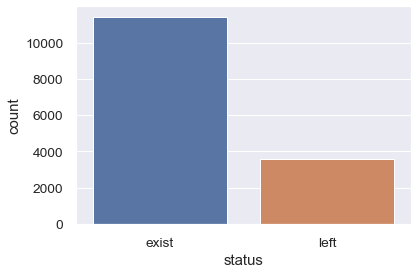

In [107]:
sns.countplot(df['status'])

### Count of Number of projects with status

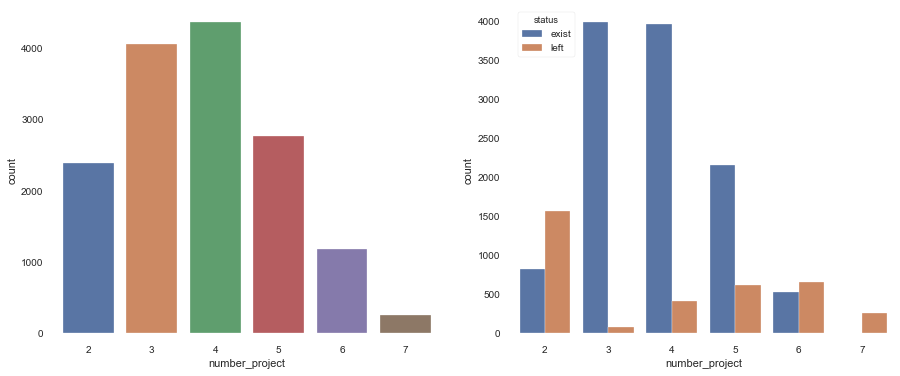

In [16]:
# Count plot of number_project by  status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(df['number_project'], ax=axes[0])
sns.countplot(df['number_project'],hue = df['status'], ax=axes[1])
plt.show()

from the plot, we came to know that the projects assignned by the company are minimmum 2 and maximum 7.The most of the  employers are left because of minimum projects with them and maximum projects those who have because work burden

### Status of employers based on Salary

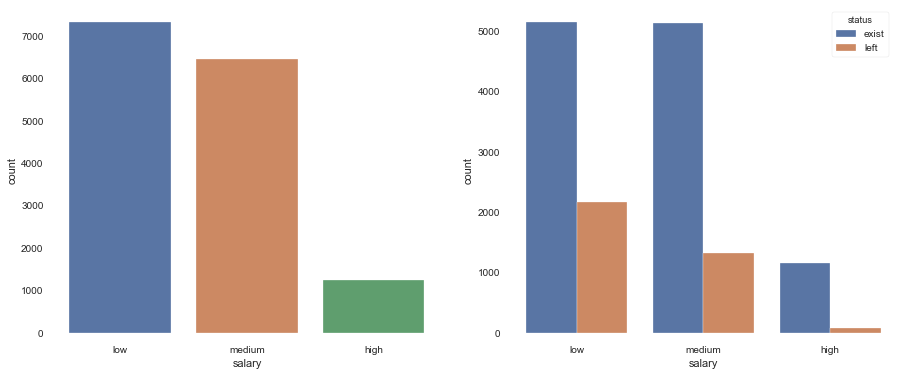

In [17]:
# Count plot of number_project by  status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(df['salary'], ax=axes[0])
sns.countplot(df['salary'],hue = df['status'], ax=axes[1])
plt.show()

In [18]:
print(pd.crosstab(df['salary'],df['status'])/len(df)*100)
pd.crosstab(df['salary'],df['status'])

status      exist       left
salary                      
high     7.700513   0.546703
low     34.295620  14.480965
medium  34.195613   8.780585


status  exist  left
salary             
high     1155    82
low      5144  2172
medium   5129  1317

from the above plot, we  came to know that most of the employers are leaving company because of less salary(approx.:14%)

### Status of employers based on department

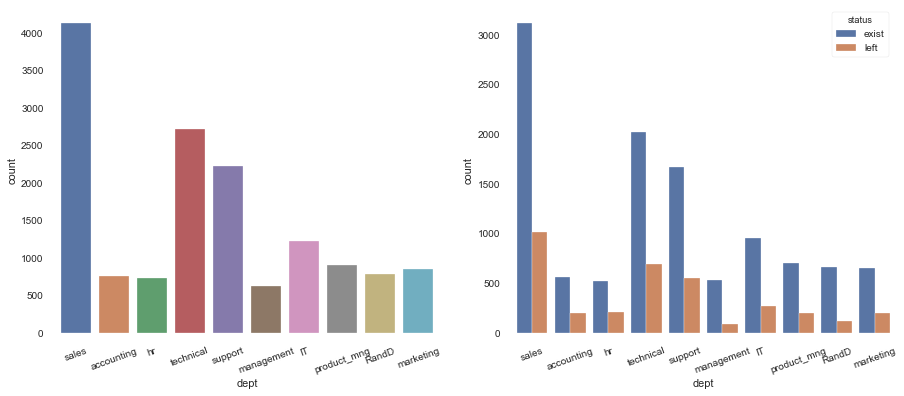

In [19]:
# Count plot of number_project by  status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()

a=sns.countplot(df['dept'], ax=axes[0])
a.tick_params(axis="x",labelrotation=20)
b=sns.countplot(df['dept'],hue = df['status'], ax=axes[1])
b.tick_params(axis="x",labelrotation=20)
plt.show()

In [20]:
print(pd.crosstab(df['dept'],df['status']))
pd.crosstab(df['dept'],df['status'])/len(df)*100


status       exist  left
dept                    
IT             954   273
RandD          666   121
accounting     563   204
hr             524   215
management     539    91
marketing      655   203
product_mng    704   198
sales         3126  1014
support       1674   555
technical     2023   697


status           exist      left
dept                            
IT            6.360424  1.820121
RandD         4.440296  0.806720
accounting    3.753584  1.360091
hr            3.493566  1.433429
management    3.593573  0.606707
marketing     4.366958  1.353424
product_mng   4.693646  1.320088
sales        20.841389  6.760451
support      11.160744  3.700247
technical    13.487566  4.646976

*  from the above plots, we came to know that most of the employers are leaving from the Sales department  as from 27% ,7% of employers are leaving from the company  and second highest department is technical department from 17% ,5% of employers are leaving.


### Status of employers based on Promotion of last 5years.

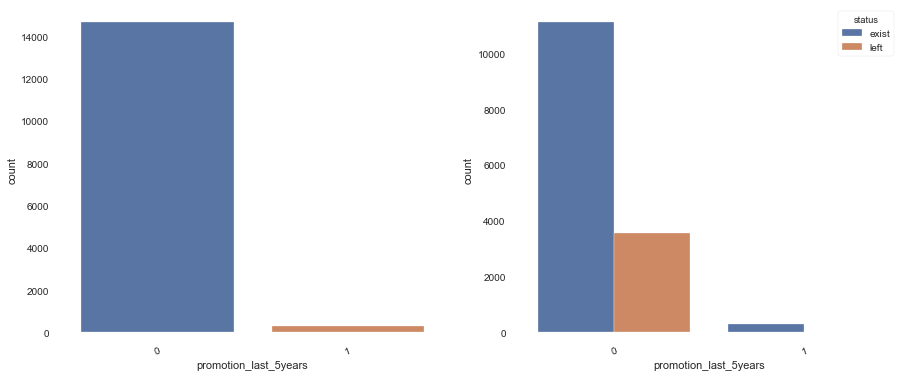

In [21]:
# Count plot of number_project by  status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()

a=sns.countplot(df['promotion_last_5years'], ax=axes[0])
a.tick_params(axis="x",labelrotation=20)
b=sns.countplot(df['promotion_last_5years'],hue = df['status'], ax=axes[1])
b.tick_params(axis="x",labelrotation=20)
plt.show()

In [22]:
print(pd.crosstab(df['promotion_last_5years'],df['status']))
pd.crosstab(df['promotion_last_5years'],df['status'])/len(df)*100


status                 exist  left
promotion_last_5years             
0                      11128  3552
1                        300    19


status                     exist       left
promotion_last_5years                      
0                      74.191613  23.681579
1                       2.000133   0.126675

As from the above data,
*  most of the employers didn't got any promotion in last 5years as like 97%.
*  From the 97% of the employers 23% of the employers  are left .

### Status of employers based on work accident

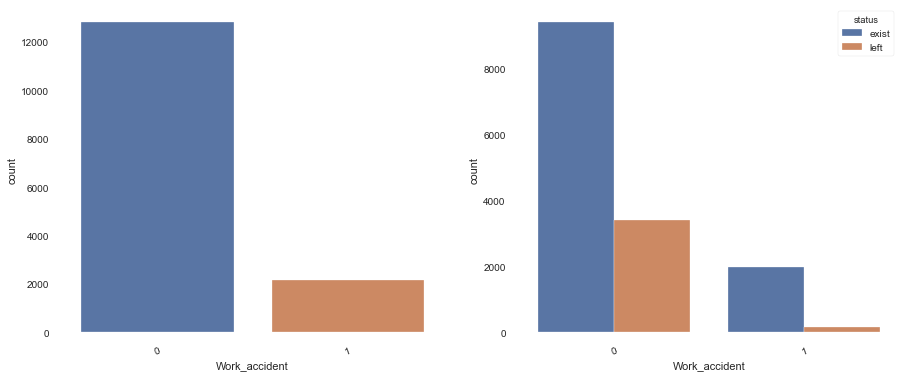

In [23]:
# Count plot of number_project by  status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()

a=sns.countplot(df['Work_accident'], ax=axes[0])
a.tick_params(axis="x",labelrotation=20)
b=sns.countplot(df['Work_accident'],hue = df['status'], ax=axes[1])
b.tick_params(axis="x",labelrotation=20)
plt.show()

In [24]:
print(pd.crosstab(df['Work_accident'],df['status']))
pd.crosstab(df['Work_accident'],df['status'])/len(df)*100


status         exist  left
Work_accident             
0               9428  3402
1               2000   169


status             exist       left
Work_accident                      
0              62.857524  22.681512
1              13.334222   1.126742

From the above data,
*    most of employers are didn't caught with any work accident as like 85%
*    from the 85% ,23% of the employers are left from company without caught with any work accident

### Status of employers who left from company based on salary and promotion

promotion_last_5years     0   1
salary                         
high                     82   0
low                    2158  14
medium                 1312   5


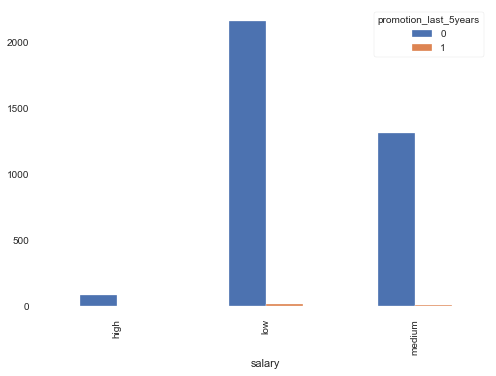

In [25]:
df1=df[df.status=='left']
x=pd.crosstab(df1["salary"],df1["promotion_last_5years"])
print(x)
pd.crosstab(df1["salary"],df1["promotion_last_5years"]).plot.bar()
plt.show()

Based on the above calculations who are left from the company:
    *    most of the employers are left from the company irrespective of salary whether it is high,low,medium .
    *    Those who are left from the company most of them are  who didn't promoted in last 5 years

### Status of employers who left and existing   based on salary and no of projects

number_project    2   3    4    5    6    7
salary                                     
high             46   3    2   15   13    3
low             966  37  249  371  405  144
medium          555  32  158  226  237  109




number_project    2     3     4    5    6
salary                                   
high             94   405   366  230   60
low             378  1754  1838  946  228
medium          349  1824  1752  973  231


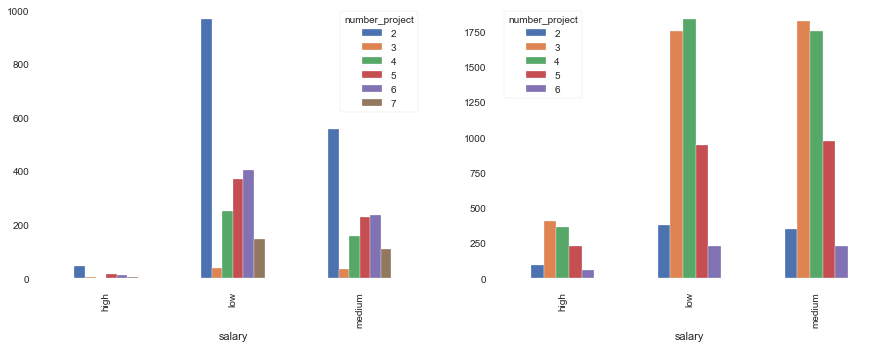

In [26]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
df1=df[df.status=='left']
x=pd.crosstab(df1["salary"],df1["number_project"])
print(x)
pd.crosstab(df1["salary"],df1["number_project"]).plot(kind='bar',ax=ax1)

print("\n")
print("\n")


df1=df[df.status=='exist']
y=pd.crosstab(df1["salary"],df1["number_project"])
print(y)
pd.crosstab(df1["salary"],df1["number_project"]).plot(kind='bar',ax=ax2)
plt.show()

As per above data:
    * Most of them are left from the company irrespective of projects they left because of salary.
    * some of they are left from the company because of they don't have much projects to show case their talent in the          industry.

### Status of employers who left and existing   based on salary and time_spend_company

salary              high  low  medium
time_spend_company                   
2                      0   22      31
3                     46  986     554
4                     16  541     333
5                     20  488     325
6                      0  135      74




salary              high   low  medium
time_spend_company                    
2                    303  1505    1383
3                    474  2219    2164
4                    157   759     751
5                     46   311     283
6                     55   198     256
7                     38    36     114
8                     18    60      84
10                    64    56      94


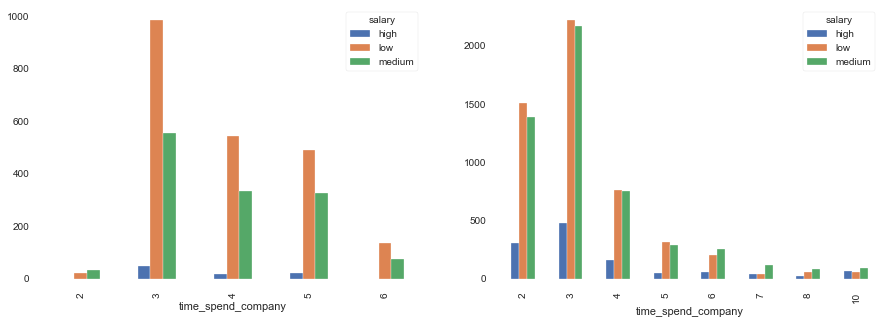

In [27]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
df1=df[df.status=='left']
x=pd.crosstab(df1["time_spend_company"],df1["salary"])
print(x)
pd.crosstab(df1["time_spend_company"],df1["salary"]).plot(kind='bar',ax=ax1)

print("\n")
print("\n")


df1=df[df.status=='exist']
y=pd.crosstab(df1["time_spend_company"],df1["salary"])
print(y)
pd.crosstab(df1["time_spend_company"],df1["salary"]).plot(kind='bar',ax=ax2)
plt.show()

From the above data:
    * Most of the employers who are left from the company are having less experience  and salary also low

In [28]:
df.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2001                0.58             0.74               4   
1    2002                0.82             0.67               2   
2    2003                0.45             0.69               5   
3    2004                0.78             0.82               5   
4    2005                0.49             0.60               3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   215                   3              0   
1                   202                   3              0   
2                   193                   3              0   
3                   247                   3              0   
4                   214                   2              0   

   promotion_last_5years   dept salary status  
0                      0  sales    low  exist  
1                      0  sales    low  exist  
2                      0  sales    low  exist  
3                      0  sales    low  exist  
4                      0  sales    low  exist

### Using  the LabelEncoder(Concerting categarical to Numarical data)

In [29]:
df['status'] = df['status'].replace({'exist':1,'left':0})
df['status'].value_counts()

1    11428
0     3571
Name: status, dtype: int64

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col=["dept","salary"]
for col in df.columns:
  df[col]=le.fit_transform(df[col])
df.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2000                  49               38               2   
1    2001                  73               31               0   
2    2002                  36               33               3   
3    2003                  69               46               3   
4    2004                  40               24               1   

   average_montly_hours  time_spend_company  Work_accident  \
0                   119                   1              0   
1                   106                   1              0   
2                    97                   1              0   
3                   151                   1              0   
4                   118                   0              0   

   promotion_last_5years  dept  salary  status  
0                      0     7       1       1  
1                      0     7       1       1  
2                      0     7       1       1  
3                      0     7       1       1  
4                      0     7       1       1

### Building model without feature engineering and feature selection..

In [31]:
from sklearn.model_selection import train_test_split
X=df.drop(["status"],axis=1)
y=df["status"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0,stratify=y)
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print('Training score =', model.score(x_train, y_train))
print('Test score =', model.score(x_test, y_test))

Training score = 0.7841699209448519
Test score = 0.7853333333333333


# Assumptions for logistic regression

1. **Dependent binary variable**

In [32]:
df['status'].value_counts()

1    11428
0     3571
Name: status, dtype: int64

The dataset has only two values in its dependent variable

2. **No repeated observations**

In [33]:
df.duplicated().value_counts()

False    14999
dtype: int64

No repeated observations or very less.

3. **No multi-collinearity**

In [34]:
# Taking the dependent and independent variables separately

X = df.drop([]'status', axis=1)
y= df['status']

# Checking the VIF values

Xc=sm.add_constant(X)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
vif['features']=Xc.columns
vif.T

0        1                   2                3  \
vif       24.0527  1.03394             1.06842          1.24224   
features    const   Emp ID  satisfaction_level  last_evaluation   

                       4                     5                   6  \
vif              1.35522               1.27924             1.08935   
features  number_project  average_montly_hours  time_spend_company   

                      7                      8        9       10  
vif             1.00535                1.01424  1.00138  1.00181  
features  Work_accident  promotion_last_5years     dept   salary

All the variables present have a VIF value close to 1, so multi co-linearity is not present.

4. **Large sample size**

In [36]:
df.shape

(14999, 11)

The sample size is large.

# Feature Selection

Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.
Feature selection is an iterative process that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

Feature selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn.

For feature selection, we will do the following:     
     
1. Perform a Chi-square test of independence and ANOVA to select only significant features based on their p-values.

In [38]:
# Performing ANOVA test
num = ['Emp ID',"satisfaction_level","last_evaluation","average_montly_hours"]
columns = []
p = []
for col in num: 

    import scipy.stats as stats
    statistic,p_value = stats.f_oneway(df[df['status']==0][col], df[df['status']==1][col])
    columns.append(col)
    p.append(p_value)
    
d1 = pd.DataFrame({'Feature':columns,'p_value':p})
d1

Feature       p_value
0                Emp ID  1.030810e-56
1    satisfaction_level  0.000000e+00
2       last_evaluation  4.212702e-01
3  average_montly_hours  2.311304e-18

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Emp ID                 14999 non-null  int64
 1   satisfaction_level     14999 non-null  int64
 2   last_evaluation        14999 non-null  int64
 3   number_project         14999 non-null  int64
 4   average_montly_hours   14999 non-null  int64
 5   time_spend_company     14999 non-null  int64
 6   Work_accident          14999 non-null  int64
 7   promotion_last_5years  14999 non-null  int64
 8   dept                   14999 non-null  int32
 9   salary                 14999 non-null  int32
 10  status                 14999 non-null  int64
dtypes: int32(2), int64(9)
memory usage: 1.6 MB


In [43]:
# Applying Chi2 test to find out the p_values

columns = []
p_value = []
for col in ["number_project","time_spend_company","Work_accident","promotion_last_5years","dept","salary","status"]:
    a = stats.chi2_contingency(pd.crosstab(df['status'], df[col]))
    columns.append(col)
    p_value.append(a[1])
    
d2 = pd.DataFrame({'Feature':columns,'p_value':p_value})
d2

Feature       p_value
0         number_project  0.000000e+00
1     time_spend_company  0.000000e+00
2          Work_accident  9.558240e-80
3  promotion_last_5years  6.344155e-14
4                   dept  7.042130e-15
5                 salary  1.652087e-83
6                 status  0.000000e+00

In [44]:
c  = pd.concat([d1,d2])

In [45]:
# Selecting significant features from the list (having p-value<0.05)
new_features = list(c[c['p_value']<0.05]['Feature'])
new_df = df.loc[:,new_features]
print(len(new_features))
new_features

10


['Emp ID',
 'satisfaction_level',
 'average_montly_hours',
 'number_project',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept',
 'salary',
 'status']

All 10 features having p-value less than 5

## Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to scale features:

1. For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.
2. For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

When we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [47]:
# Taking the dependent and independent variables separately and splitting them into train and test dataset

X = new_df.drop('status',axis=1)
y= new_df['status']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0,stratify=y)

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### Models to Evaluate

We will compare different machine learning models using the great Scikit-Learn library:

1. Logistic Regression
2. Naive-Bayes
3. Decision Tree Classifier
4. Random Forest Classifier
5. Ada Boost Classifier
6. Gradient Boost Classifier
7. Ensemble models

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning.

### Gini Coefficient
Gini coefficient is sometimes used in classification problems. Gini coefficient can be straigh away derived from the AUC ROC number. Gini is nothing but ratio between area between the ROC curve and the diagnol line & the area of the above triangle. Following is the formulae used :

Gini = 2*AUC – 1

Gini above 60% is a good model.

In [76]:
# Function to fit and evaluate a model

train = []
test = []
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))
  train.append(roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  test.append(roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  print("classification_report")
  print(classification_report(y_test,y_test_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
  
  roc_auc = auc(fpr, tpr)
  print("roc_auc",roc_auc)
  GINI = (2 * roc_auc) - 1
  print("GINI",GINI)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

### Logistic Regression

auc score of train data 0.8123956494561821
auc score of test data 0.8140003741362396
confusion_matrix [[ 424  647]
 [ 246 3183]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.40      0.49      1071
           1       0.83      0.93      0.88      3429

    accuracy                           0.80      4500
   macro avg       0.73      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500

roc_auc 0.8140003741362396
GINI 0.6280007482724792


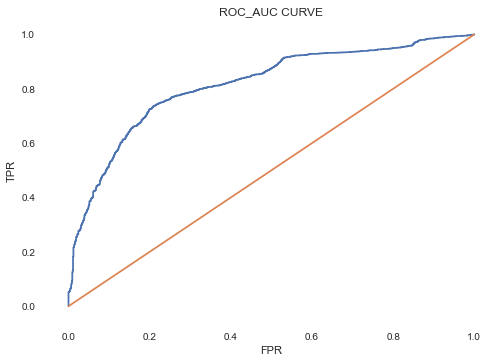

In [77]:
lr = LogisticRegression()
model_fit(lr,X_train_s,y_train,X_test_s,y_test)

### Naive-Bayes

auc score of train data 0.9060718589823729
auc score of test data 0.9024724305975915
confusion_matrix [[ 810  261]
 [ 360 3069]]
classification_report
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1071
           1       0.92      0.90      0.91      3429

    accuracy                           0.86      4500
   macro avg       0.81      0.83      0.82      4500
weighted avg       0.87      0.86      0.86      4500

roc_auc 0.9024724305975915
GINI 0.804944861195183


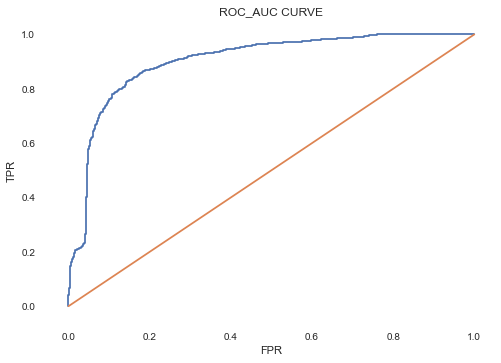

In [78]:
nb = GaussianNB()
model_fit(nb,X_train,y_train,X_test,y_test)

### Decision Tree Classifier

auc score of train data 1.0
auc score of test data 0.9995331465919701
confusion_matrix [[1070    1]
 [   0 3429]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1071
           1       1.00      1.00      1.00      3429

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

roc_auc 0.9995331465919701
GINI 0.9990662931839402


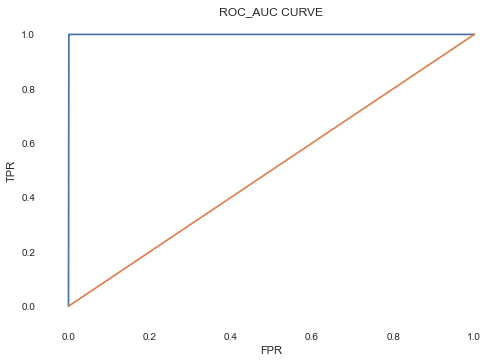

In [79]:
dt = DecisionTreeClassifier()
model_fit(dt,X_train,y_train,X_test,y_test)

### Random Forest Classifier

auc score of train data 1.0
auc score of test data 0.9999918310864737
confusion_matrix [[1065    6]
 [   2 3427]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1071
           1       1.00      1.00      1.00      3429

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

roc_auc 0.9999918310864737
GINI 0.9999836621729474


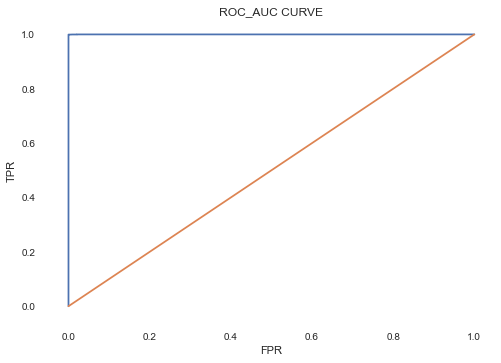

In [80]:
rf = RandomForestClassifier()
model_fit(rf,X_train,y_train,X_test,y_test)

# Model Optimization

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

## Hyperparameters

Hyperparameters
First off, we need to understand what model hyperparameters are in contrast to model parameters :

* Model hyperparameters are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression.
* Model parameters are what the model learns during training, such as the weights in the linear regression.

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features).

Tuning the model hyperparameters controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set.

The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn.

## Hyperparameter Tuning with Random Search and Cross Validation

We can choose the best hyperparameters for a model through random search and cross validation.

* Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options.

* Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we **did not train on**. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.

We let Scikit-Learn and RandomizedSearchCV do the process for us!

##### Hyper parameter tuning for Decision Tree Classifier

In [81]:
dt = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 24),
    'min_samples_leaf': range(10, 150),
    'min_samples_split': range(10, 150),
    'criterion': ["entropy", "gini"]}
RS_dt = RandomizedSearchCV(dt, parameters, 
                    cv=3, scoring="accuracy",random_state=0)
RS_dt.fit(X_train,y_train)
RS_dt.best_params_

{'min_samples_split': 101,
 'min_samples_leaf': 93,
 'max_depth': 16,
 'criterion': 'entropy'}

auc score of train data 1.0
auc score of test data 0.9995331465919701
confusion_matrix [[1070    1]
 [   0 3429]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1071
           1       1.00      1.00      1.00      3429

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

roc_auc 0.9995331465919701
GINI 0.9990662931839402


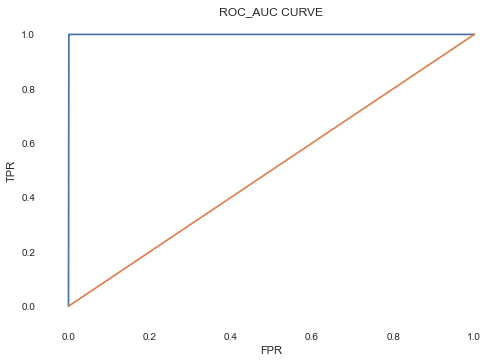

In [82]:
dt = DecisionTreeClassifier(**RS_dt.best_params_)
model_fit(dt,X_train,y_train,X_test,y_test)

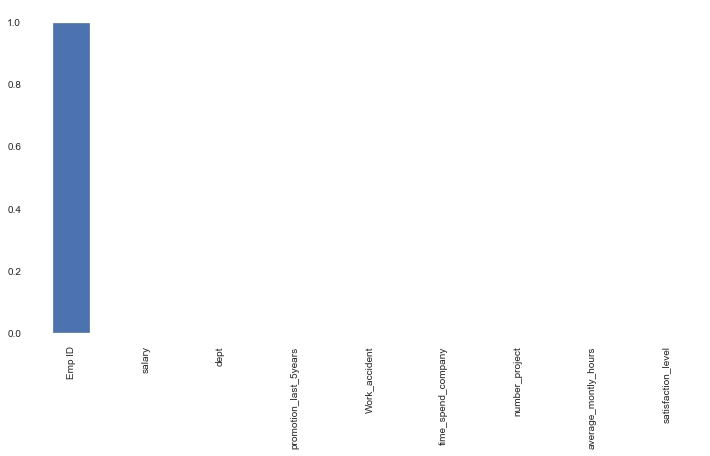

In [83]:
importance = pd.Series(dt.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.show()

##### Hyper parameter tuning for Random Forest Classifier

In [84]:
rf = RandomForestClassifier()
parameters={'max_depth':[2,4,6,8,10],'min_samples_leaf':range(1,50),
            'min_samples_split':range(10,100),'n_estimators':[1,2,3,4,5,6]}
RS_rf= RandomizedSearchCV(rf, param_distributions=parameters, cv=3,random_state=0)
RS_rf.fit(X_train,y_train)
RS_rf.best_params_

{'n_estimators': 2,
 'min_samples_split': 82,
 'min_samples_leaf': 13,
 'max_depth': 8}

auc score of train data 0.9997859482435305
auc score of test data 0.999474058117463
confusion_matrix [[1063    8]
 [   9 3420]]
classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1071
           1       1.00      1.00      1.00      3429

    accuracy                           1.00      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       1.00      1.00      1.00      4500

roc_auc 0.999474058117463
GINI 0.9989481162349261


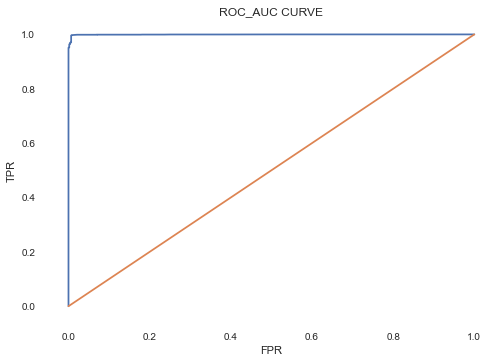

In [85]:
rf = RandomForestClassifier(**RS_rf.best_params_,random_state=0)
model_fit(rf,X_train,y_train,X_test,y_test)

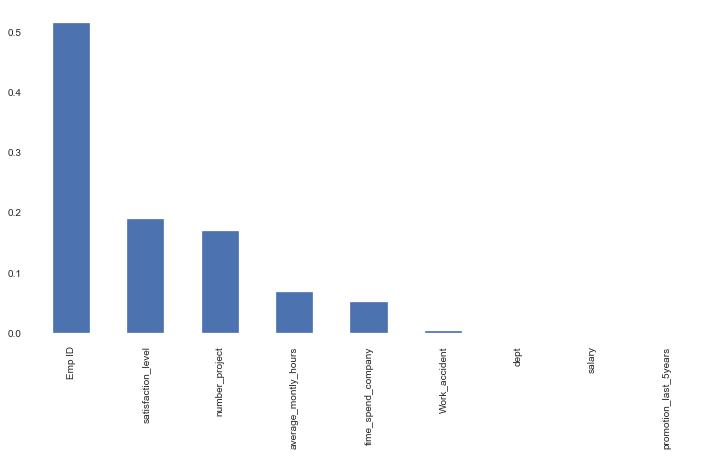

In [86]:
importance = pd.Series(rf.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.show()

In [87]:
score = pd.DataFrame({'model':['Logistic Regression', 'Naive-Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'Decision Tree (tunned)',
                               'Random Forest (tunned)'],
                     'train_accuracy':train,'test_accracy':test})
score

model  train_accuracy  test_accracy
0       Logistic Regression        0.812396      0.814000
1               Naive-Bayes        0.906072      0.902472
2  Decision Tree Classifier        1.000000      0.999533
3  Random Forest Classifier        1.000000      0.999992
4    Decision Tree (tunned)        1.000000      0.999533
5    Random Forest (tunned)        0.999786      0.999474

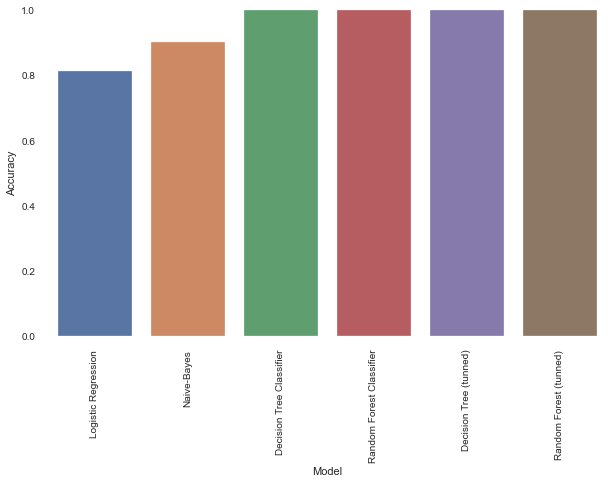

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x="model", y="test_accracy", data=score)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.xticks(rotation=90)
plt.show()